### Import required libraries and ignore the warning messages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn as skn
import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read & Print DataSet

In [2]:
df = pd.read_csv("Data/Profiling.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [3]:
df.shape
# Here we have 4 object attributes, which we needs to convert into numerical form.

(22544, 40)

In [4]:
# Descriptive statistics
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253600e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039904e+04,2.056430e+03,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728703e+05,2.122210e+04,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# print columns

print(df.columns.values)

['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'wrong_fragment' 'hot' 'num_failed_logins' 'logged_in' 'num_compromised'
 'root_shell' 'su_attempted' 'num_root' 'num_file_creations' 'num_shells'
 'num_access_files' 'num_outbound_cmds' 'is_host_login' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'class']


In [6]:
# Print different column with their types
print("=========> Numerical values")
print(df.select_dtypes(include=['float64','int64']).columns)

print("\n=========> Object")
print(df.select_dtypes(include=['object']).columns)

=========> Numerical values
Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

=========> Object
Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')


### Check missing values and handle it


In [7]:
print("Missing values if any: ")
print(df.isna().sum())

# Here we have null values for src_bytes and dst_bytes. We can use different techniques to remove the null records. 

Missing values if any: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      8
dst_bytes                      6
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count     

In [8]:
# We have plenty of data, so we can directly delete the null row as it will not affect the data quality.

df = df.dropna()
df.shape

# We can see, rows have been reduced to 22530 with 40 attributes.

(22530, 40)

In [9]:
# Lets reset the index for the data.

df.reset_index(inplace = True)

In [10]:
# Lets check the missing values.

print("*****In the train set*****")
print(df.isna().sum())

# Now we can see, null values are not present in the data. 

*****In the train set*****
index                          0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_ra

### Data for each attributes.

Here we will see the spread of data and the count of each unique values.
This will help us to get the data quality, whether it is skewed or not.

From this insight, we can check attribute quality and if is not useful then we can remove it.



In [11]:
# Lets see the data for each attributes and their counts.

for col in df.columns:
    print("============"+str(col)+"==========")
    print(df[col].value_counts())
    print("\n")

============index==========
0        1
12286    1
3419     1
1370     1
7513     1
        ..
677      1
2724     1
12963    1
15010    1
2047     1
Name: index, Length: 22530, dtype: int64


============duration==========
0       19005
1         587
4         539
282       240
280       216
        ...  
7258        1
7242        1
937         1
4497        1
2873        1
Name: duration, Length: 624, dtype: int64


============protocol_type==========
tcp     18867
udp      2620
icmp     1043
Name: protocol_type, dtype: int64


============service==========
http       7845
private    4772
telnet     1625
pop_3      1019
smtp        932
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64


============flag==========
SF        14862
REJ        3849
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dt

anomaly    12829
normal      9701
Name: class, dtype: int64




From the above insights we can see "num_outbound_cmds" has only one value for all rows. 
'num_outbound_cmds' is a redundant column so remove it from both datasets

In [12]:
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [13]:
# Lets check the new dataset values and confirm the column is removed.
df.head()

,index,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,tcp,private,REJ,0.0,0.0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,1,0,tcp,private,REJ,0.0,0.0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


### Scaling attributes using StandardScaler




In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df.select_dtypes(include=['float64','int64']).columns
df_scale = scaler.fit_transform(df.select_dtypes(include=['float64','int64']))


In [15]:
# turn the result back to a dataframe
df_new = pd.DataFrame(df_scale, columns = cols)
df_new.head()

,index,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-1.734102,-0.155436,-0.021995,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,0.649865,-1.169530,-1.305065,-0.138524,-0.431918,-0.229957,-0.358243,-0.352869,1.979321,1.928621
1,-1.733949,-0.155436,-0.021995,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,0.649865,-1.250040,-1.396868,-0.138524,-0.431918,-0.229957,-0.358243,-0.352869,1.979321,1.928621
2,-1.733795,-0.154014,0.005458,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-0.637106,-0.489668,0.003131,-0.229116,1.559327,0.004188,-0.358243,-0.352869,-0.602849,-0.565622
3,-1.733641,-0.155436,-0.021952,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-2.030439,-0.749089,0.898213,-0.410298,2.832418,3.048073,-0.358243,-0.352869,-0.602849,-0.565622
4,-1.733487,-0.154725,-0.021995,-0.096189,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-1.753900,-0.489668,-0.685393,0.359727,-0.333988,0.004188,-0.358243,-0.352869,1.540352,1.205291


In [16]:
df_new.shape

(22530, 36)

### ENCODING CATEGORICAL ATTRIBUTES

We have 4 categorical attributes including class attribute, which we needs to convert into numerical.
Here we will use get_dummies

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df_cat = df.select_dtypes(include=['object']).copy().apply(encoder.fit_transform)

In [18]:
df_cat.shape

(22530, 4)

In [19]:
df_cat.head()

,protocol_type,service,flag,class
0,1,45,1,0
1,1,45,1,0
2,1,19,9,1
3,0,13,9,0
4,1,55,2,0


In [20]:
# separate target column from encoded data 
df_tmp = df_cat.drop(['class'], axis=1)
df_Y = df_cat[['class']].copy()

In [21]:
print(df_tmp.shape)
print(df_Y.shape)

(22530, 3)
(22530, 1)


In [22]:
# Append numerical df and categorical encoded df to form single X dataset

df_X = pd.concat([df_new,df_tmp],axis=1)
df_X.shape

(22530, 39)

In [23]:
# Append numerical df and categorical encoded df to form single X dataset
df_Y.shape

(22530, 1)

In [24]:
df_X.head()

,index,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-1.734102,-0.155436,-0.021995,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-0.138524,-0.431918,-0.229957,-0.358243,-0.352869,1.979321,1.928621,1,45,1
1,-1.733949,-0.155436,-0.021995,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-0.138524,-0.431918,-0.229957,-0.358243,-0.352869,1.979321,1.928621,1,45,1
2,-1.733795,-0.154014,0.005458,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-0.229116,1.559327,0.004188,-0.358243,-0.352869,-0.602849,-0.565622,1,19,9
3,-1.733641,-0.155436,-0.021952,-0.096896,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,-0.410298,2.832418,3.048073,-0.358243,-0.352869,-0.602849,-0.565622,0,13,9
4,-1.733487,-0.154725,-0.021995,-0.096189,-0.059122,-0.113557,-0.143885,-0.890068,-0.016499,-0.049469,...,0.359727,-0.333988,0.004188,-0.358243,-0.352869,1.540352,1.205291,1,55,2


In [25]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_X.corr()

corr_unstack = cor.unstack()
corr_unstack_sort = corr_unstack.sort_values(kind="quicksort")

corr_unstack_sort.to_excel('df_X.xlsx')

<Figure size 864x720 with 0 Axes>

### Feature selection and Training Module

### Training and testing dataset

In [33]:
# Lets seperate training and testing datasets.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y,train_size=0.70, random_state=2)

print("Training dataset details:")
print(X_train.shape)
print(Y_train.shape)

print("\nTesting dataset details:")
print(X_test.shape)
print(Y_test.shape)

Training dataset details:
(15770, 39)
(15770, 1)

Testing dataset details:
(6760, 39)
(6760, 1)


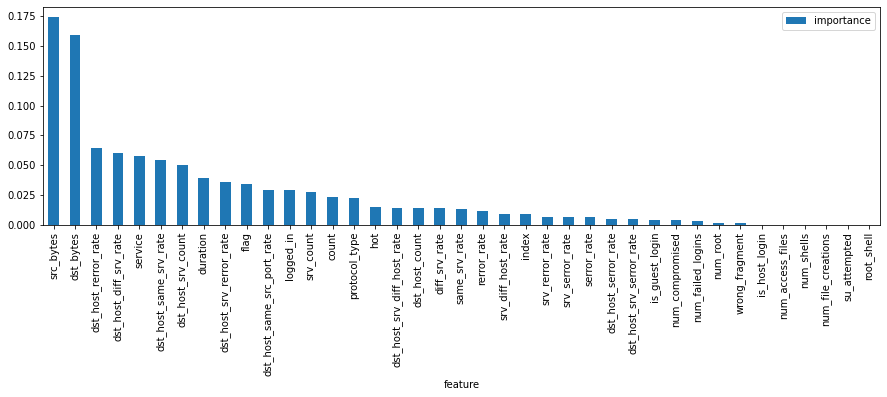

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, Y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15, 4)
importances.plot.bar();

In [35]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, Y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['duration',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [36]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8440076093849079

Model Accuracy:
 0.842993024730501

Confusion matrix:
 [[6969 2025]
 [ 451 6325]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      8994
           1       0.76      0.93      0.84      6776

    accuracy                           0.84     15770
   macro avg       0.85      0.85      0.84     15770
weighted avg       0.86      0.84      0.84     15770



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9839568801521876

Model Accuracy:
 1.0

Confusion matrix:
 [[8994    0]
 [   0 6776]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8994
           1       1.00      1.00      1.00      6776
